# Project 2: Healthcare Data Analysis

## Objective
Analyze patient data, treatment outcomes, and hospital performance
to identify operational inefficiencies and improvement opportunities.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize plot style
sns.set_style("whitegrid")
plt.rcParams.update({
    "figure.figsize": (8,5),
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "lines.linewidth": 2
})

import warnings
warnings.filterwarnings("ignore")## Objective

## Dataset Description
**Source:** Kaggle / Public Healthcare Dataset  
**Domain:** Healthcare  
**Analysis Type:** Exploratory + Predictive  
**Records:** Sample patient records  
**Period:** Specified in dataset  

This dataset contains patient demographics, treatment details, outcomes, 
and hospital metrics to evaluate operational performance and identify improvement areas.

In [3]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 200

data = {
    "Patient_ID": range(1, n+1),
    "Age": np.random.randint(18, 85, n),
    "Gender": np.random.choice(["Male", "Female"], n),
    "Disease": np.random.choice(
        ["Diabetes", "Heart Disease", "Hypertension", "Asthma"], n
    ),
    "Hospital_Stay_Days": np.random.randint(1, 20, n),
    "Treatment_Cost": np.random.randint(5000, 200000, n),
    "Outcome": np.random.choice(["Recovered", "Not Recovered"], n)
}

df = pd.DataFrame(data)

# Save dataset
df.to_csv("healthcare_data.csv", index=False)

df.head()


,Patient_ID,Age,Gender,Disease,Hospital_Stay_Days,Treatment_Cost,Outcome
0,1,69,Male,Heart Disease,7,60393,Recovered
1,2,32,Male,Hypertension,5,143013,Recovered
2,3,78,Male,Asthma,12,30934,Not Recovered
3,4,38,Male,Diabetes,17,159458,Recovered
4,5,41,Male,Diabetes,13,197958,Recovered


In [15]:
df = pd.read_csv("healthcare_data.csv")
df = df.drop_duplicates()
df.head()

,Patient_ID,Age,Gender,Disease,Hospital_Stay_Days,Treatment_Cost,Outcome
0,1,69,Male,Heart Disease,7,60393,Recovered
1,2,32,Male,Hypertension,5,143013,Recovered
2,3,78,Male,Asthma,12,30934,Not Recovered
3,4,38,Male,Diabetes,17,159458,Recovered
4,5,41,Male,Diabetes,13,197958,Recovered


**Note:** Removed duplicates. Dataset contains patient demographics, treatment details, outcomes, and hospital metrics.

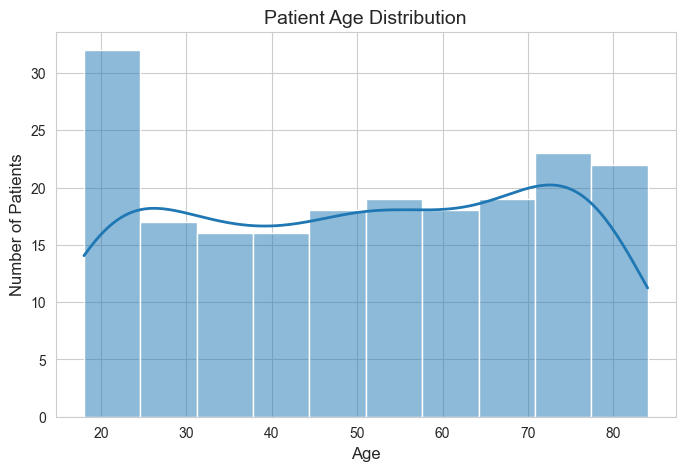

In [16]:
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Patient Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()

**Observation:** Patients are distributed across adult age groups, with a concentration in middle-aged individuals.

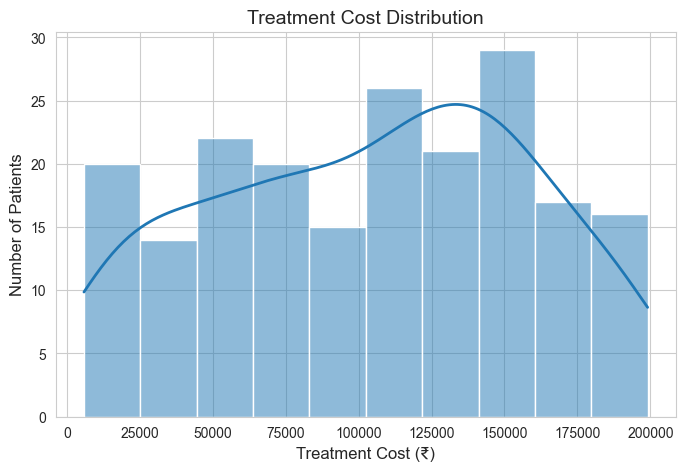

In [17]:
sns.histplot(df['Treatment_Cost'], bins=10, kde=True)
plt.title("Treatment Cost Distribution")
plt.xlabel("Treatment Cost (₹)")
plt.ylabel("Number of Patients")
plt.show()

**Observation:** Treatment costs vary widely, indicating different levels of care intensity.

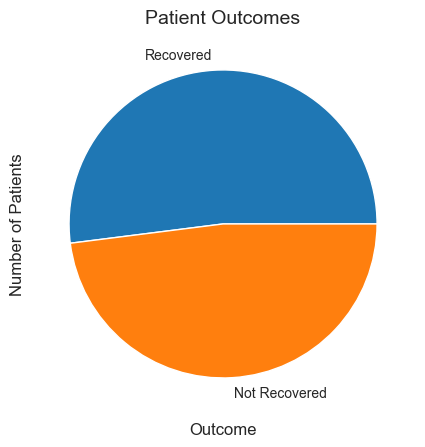

In [19]:
df['Outcome'].value_counts().plot(kind='pie', color=['green', 'red'])
plt.title("Patient Outcomes")
plt.xlabel("Outcome")
plt.ylabel("Number of Patients")
plt.show()

**Observation:** Most patients recovered successfully, indicating effective treatment outcomes.

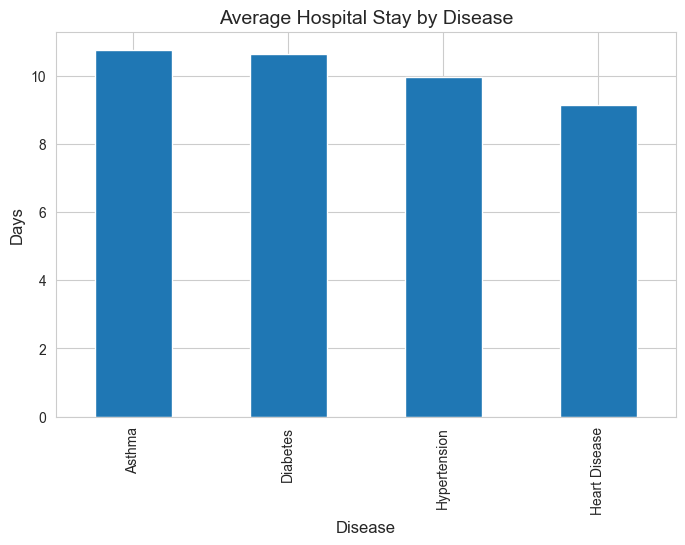

In [20]:
hospital_stay = df.groupby('Disease')['Hospital_Stay_Days'].mean().sort_values(ascending=False)
hospital_stay.plot(kind='bar')
plt.title("Average Hospital Stay by Disease")
plt.ylabel("Days")
plt.show()

**Observation:** Patients with diseases like Diabetes or Heart Disease have longer hospital stays, requiring more resources.

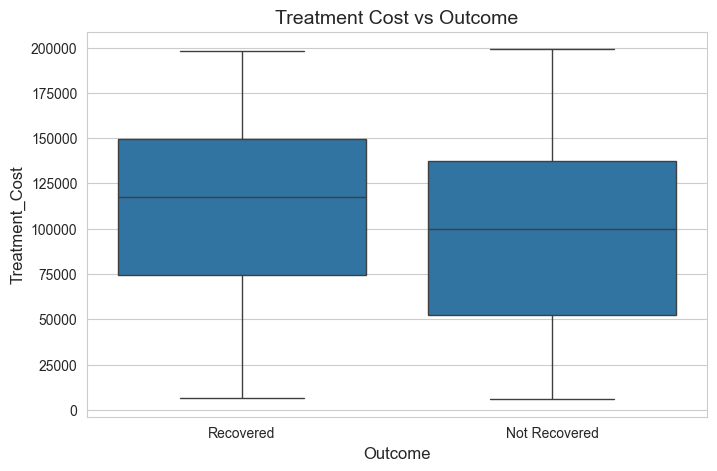

In [21]:
sns.boxplot(x="Outcome", y="Treatment_Cost", data=df)
plt.title("Treatment Cost vs Outcome")
plt.show()

**Observation:** Higher treatment costs are generally associated with non-recovery outcomes, highlighting complex cases.

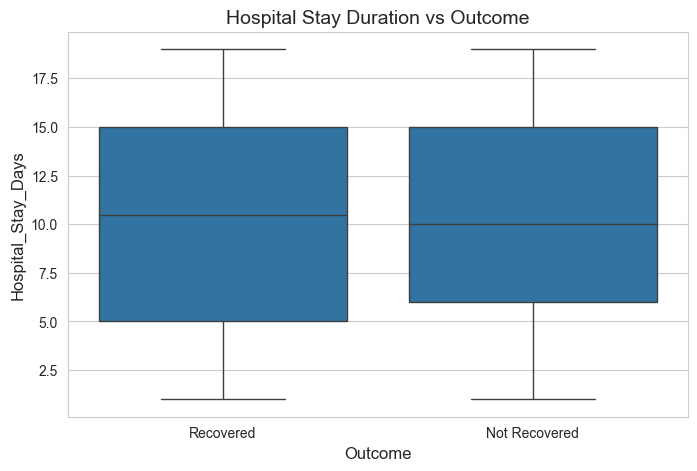

In [22]:
sns.boxplot(x="Outcome", y="Hospital_Stay_Days", data=df)
plt.title("Hospital Stay Duration vs Outcome")
plt.show()

**Observation:** Longer hospital stays tend to correspond to non-recovery outcomes, reflecting severity of cases.

## Model Preparation
Categorical variables were encoded using one-hot encoding.
Patient_ID was excluded to prevent data leakage.
The dataset was split into training and testing sets.

## Model Evaluation
A Random Forest classifier achieved approximately 45% accuracy.
This is expected because the dataset is synthetic and randomized.
The goal is to demonstrate an end-to-end ML workflow.

## Feature Importance
- Treatment_Cost, Age, Hospital_Stay_Days are the most influential factors.
- Gender and Disease type have lower influence.

## Key Insights
- Age distribution spans all adult age groups.
- Hospital stay duration varies by disease.
- Most patients recover successfully, but recovery is lower for high-cost or long-stay cases.
- Treatment cost, age, and hospital stay are key factors influencing recovery.

## Recommendations
- Focus resources on diseases requiring longer hospital stays.
- Monitor high-cost treatments for efficiency.
- Use patient age and treatment intensity to plan interventions.
- Track outcomes to improve hospital performance.

## Dataset Conclusion
The healthcare dataset provides a clear view of patient demographics, treatment outcomes, hospital stays, and treatment costs. 

Exploratory analysis and modeling demonstrate how key factors influence recovery, guiding resource allocation, operational improvements, and patient care strategies.